In [1]:
%matplotlib widget
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import FormatStrFormatter

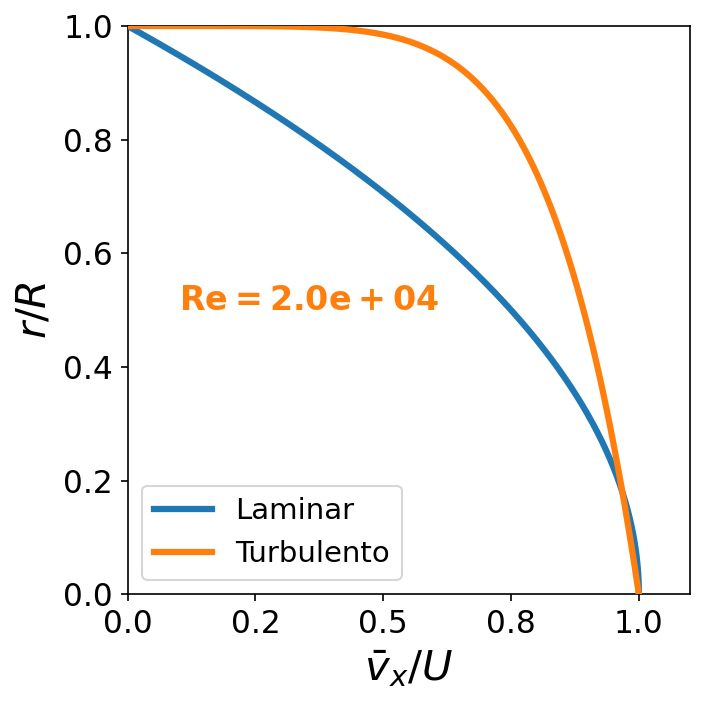

In [ ]:

with plt.ioff():
    fig_perf = plt.figure(figsize=plt.figaspect(1.),dpi=150)
    ax_perf =  fig_perf.add_subplot(111)

    fig_perf.canvas.toolbar_visible = False
    fig_perf.canvas.header_visible = False
    fig_perf.canvas.footer_visible = False
    fig_perf.canvas.resizable = False

    
x=np.linspace(0,1,100000)
y_lam=1-x**2

ax_perf.tick_params(axis="both", labelsize=15)
ax_perf.set_xticks(np.arange(0,1.25,0.25))
ax_perf.set_xlabel(r'$\bar{v}_x/U$',fontsize=20)
ax_perf.set_ylabel(r'$r/R$',fontsize=20)

ax_perf.set_xlim(0,1.1)
ax_perf.set_ylim(0,1)

ax_perf.yaxis.set_major_formatter(FormatStrFormatter('%.1f'))
ax_perf.xaxis.set_major_formatter(FormatStrFormatter('%.1f'))

perf_lam, = ax_perf.plot(y_lam,x,label='Laminar',linewidth=3,zorder=5)

def v_turb(Re):
    n = -1.7+1.8*np.log10(Re)
    return np.power(1-x,1/n)

perf_turb, =     ax_perf.plot(v_turb(2*10**4),x,
                              label=fr'Turbulento',
                              linewidth=3,zorder=10)
text_Re = ax_perf.text(0.1,0.5,fr'$\mathbf{{Re}}\mathbf{{={2*10**4:.1e}}}$',fontsize=16,color='C1')

ax_perf.legend(loc='lower left',fontsize=14)

plt.tight_layout()
display(fig_perf)

def update_perf(Re):
    perf_turb.set_xdata(v_turb(Re))
    text_Re.set_text(fr'$\mathbf{{Re}}\mathbf{{={Re:.1e}}}$')
    ax_perf.legend(loc='lower left',fontsize=14)

steps = np.logspace(4,8,num=100,endpoint=True)+10000
def Play_Re(step):
    Re = steps[step]
    update_perf(Re)
    plt.savefig(fr'perf_{step:0>4}.png')

for i in range(len(steps)):
    Play_Re(i)


In [ ]:
import glob
from PIL import Image

In [ ]:
fp_in = "./perf_*.png"
fp_out="./perf.gif"

imgs = (Image.open(f) for f in sorted(glob.glob(fp_in)))
img = next(imgs)  # extract first image from iterator
img.save(fp=fp_out, format='GIF', append_images=imgs,
         save_all=True, duration=50, loop=0)


In [ ]:
%%bash
rm perf_*png